<img src='https://coopersystem.com.br/wp-content/uploads/2020/10/blogpost-inteligencia-artificial-fatos-1024x322.png' height="100%" width="3500">

# <font color=blue|blue|red>Case Inteligência Artificial</font> 

Opa, tudo bom? Seja muito bem vindo ao Case de IA!

<ins>**_Qual será sua task:_**</ins>

"Você foi contratado como um Cientista de Dados de uma grande empresa. Logo no primeiro dia de trabalho seus superiores lhe mostraram os diversos problemas e desafios que você teria que resolver. Um deles está relacionado à uma base de dados do naufrágio do Titanic e seu objetivo seria desenvolver um modelo de Machine Learning que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input. Você logo de cara lembrou do KNN, um ótimo modelo de classificação e decidiu aplicá-lo na base de dados"

### Base de Dados:
- O nome do arquivo com a base de dados é: "titanic_data.csv"

- Abaixo estão as descrições das colunas do nosso Dataset:
    - passengerid = ID do passageiro do navio (código primário).
    - survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não       sobreviveu.
    - pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior       classe.
    - name = Nome do passageiro
    - sex = Gênero do passageiro, sendo masculino e feminino.
    - age = Idade do passageiro na data da ocorrência do naufrágio.
    - sibsp = Número de irmãos / cônjuges a bordo.
    - parch = Número de pais / filhos a bordo.
    - ticket = Código do ticket.
    - fare = Valor da passagem.
    - cabin = Código de identificação da Cabine.
    - embarked = Local ondem o passageiro embarcou no navio.

### Sua Estratégia:

Para não ter erro em sua entrega, você decidiu iniciar o projeto estudando um pouco mais sobre o KNN. Ao avisar seu chefe Douglas, ele lhe deu a liberdade de pesquisar por toda a internet e recomendou as seguintes fontes:

- (FEA.Dev) Machine Learning usando Python - modelo KNN (AULA PRÁTICA): https://www.youtube.com/watch?v=xL2RK0QYtHc
- DataCamp: Supervised Learning with scikit-learn: https://learn.datacamp.com/courses/supervised-learning-with-scikit-learn
- StatQuest: K-nearest neighbors, Clearly Explained: https://www.youtube.com/watch?v=HVXime0nQeI
- Machine Learning na prática com o algoritmo KNN em Python: https://minerandodados.com.br/machine-learning-na-pratica-knn-python/

Além das recomendações, por ser seu primeiro projeto, Douglas resolveu lhe ajudar dando algumas dicas:

1. Explore um pouco a base de dados, entenda as colunas e qual o será o seu objetivo.


2. Faça uma análise inicial dos dados e realize um tratamento deles (se necessário).


3. Separe os dados em conjunto de treino(70%) e conjunto de test (30%)
    - Caso não saiba o que é isso, de uma googlada.


4. Crie o modelo
    - Recomendação de biblioteca: scikit-learn (o famoso sklearn)
    
    
5. Procure por métricas de avaliação do seu modelo

### Meta proposta pelo Douglas

Para ser considerado um bom modelo, Douglas colocou como meta uma precisão de pelo menos 60% no conjunto de teste (Obs: Lembre-se que a precisão do modelo no conjunto de treinamento e no conjunto de teste serão diferentes e o que Douglas está avaliando é no conjunto de teste)

### Dúvidas

Caso tenha dúvidas ou problemas no código sinta-se livre para chamar qualquer membro do grupo de estudo de IA do FEA.Dev.

### <font color=blue|blue|red>A partir de agora é o seu momento de desenvolver o modelo, Boa Sorte!</font> 

Nome: Edgar dos Santos Ramos
### Objetivo
O objetivo, através de um modelo de classificação, é prever com ao menos 60% de precisão se um passageiro sobreviveria ou não ao acidente do Titanic de acordo com suas atribuições. Ou seja, a coluna "survived" é o Target(y) e as outras são as Features(X).

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

### Exploratory Data Analysis (EDA) - Análise Básica do Dataset

In [2]:
# Lendo o arquivo titanic_data.csv
df = pd.read_csv("titanic_data.csv")

In [3]:
# Printando as primeiras linhas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Printando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Printando as descrições
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Tratamento de Dados

In [6]:
# Transformando a coluna PassengerID em Index
df = df.set_index('PassengerId')

In [7]:
# Retirando a coluna "name", já que ela não impacta na sobrevivência ou não do passageiro
df = df.drop('Name', 1)

In [8]:
# Vendo quais colunas possuem valores nulos
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Eliminando as linhas que possuem itens NA
df = df.dropna()

In [10]:
# Utilizando a função pd.get_dumies() para criar novas colunas para cada tipo de valor.
df_dummy = pd.get_dummies(df)
df_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
2,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,1,54.0,0,0,51.8625,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,1,3,4.0,1,1,16.7000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
12,1,1,58.0,0,0,26.5500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Matriz de Correlação e Análise Gráfica

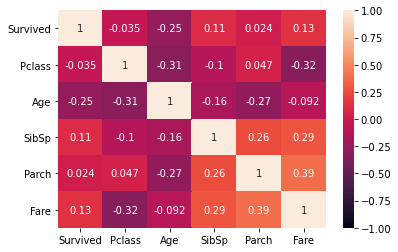

In [11]:
# Criando a matriz de correlação entre todas as colunas
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)
plt.show()

### Criando o modelo de Machine Learning KNN

In [12]:
# Coluna Target = "Survived"
# Colunas Feature = pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked
X = np.array(df_dummy.drop(['Survived'], 1))
y = np.array(df_dummy['Survived'])

In [13]:
# Vamos definir os Dataset de Treino (70%) e Teste (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
# Devemos normalizar os valores, para que todos os dados tenham a mesma escala
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

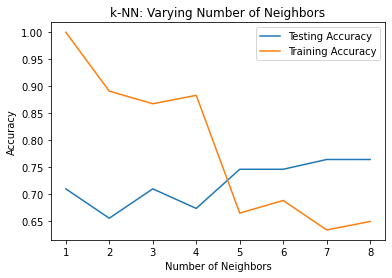

In [15]:
# Testando qual o melhor valor para o a variável Neighbors
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [16]:
# Vamos utilizar k = 5, onde há a maior precisão do conjunto de teste, fator analisado por Douglas.
# Criando o modelo

knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

# Agora, é necessário treinar o modelo
knn.fit(X_train, y_train)



KNeighborsClassifier(metric='euclidean')

In [17]:
# Vamos usar o a função clf.score() para avaliar o conjunto de teste
accuracy = knn.score(X_test, y_test)
print(f"A precisão do conjunto de teste do modelo criado foi de: {round(accuracy*100, 2)}%")

A precisão do conjunto de teste do modelo criado foi de: 74.55%


### Otimizando o modelo - retirando as colunas "Ticket" e "Cabin"
O código do ticket e da cabine não contribuem para a sobrevivência ou não do passageiro


In [18]:
#Dropando as colunas "Ticket" e "Cabin"
df = df.drop('Ticket', 1)
df = df.drop('Cabin', 1)

Agora, basta repetir o processo feito anteriormente:

In [19]:
# Utilizando a função pd.get_dumies() para criar novas colunas para cada tipo de valor.
df_dummy = pd.get_dummies(df)
df_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
7,0,1,54.0,0,0,51.8625,0,1,0,0,1
11,1,3,4.0,1,1,16.7000,1,0,0,0,1
12,1,1,58.0,0,0,26.5500,1,0,0,0,1


In [20]:
# Coluna Target = "Survived"
# Colunas Feature = pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked
X = np.array(df_dummy.drop(['Survived'], 1))
y = np.array(df_dummy['Survived'])

In [21]:
# Vamos definir os Dataset de Treino (70%) e Teste (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
# Devemos normalizar os valores, para que todos os dados tenham a mesma escala
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

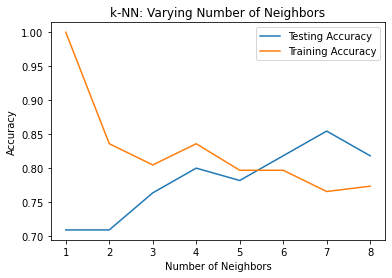

In [23]:
# Testando qual o melhor valor para o a variável Neighbors
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# Vamos utilizar k = 7, onde há a maior precisão do conjunto de teste, fator analisado por Douglas.
# Criando o modelo
knn = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')

# Agora, é necessário treinar o modelo
knn.fit(X_train, y_train)



KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [25]:
# Vamos usar o a função clf.score() para avaliar o conjunto de teste
accuracy_new = knn.score(X_test, y_test)
print(f"A precisão do conjunto de teste do novo modelo criado foi de: {round(accuracy_new*100, 2)}%")
print(f"Houve um aumento de {round((accuracy_new - accuracy)*100, 2)}% na eficácia do conjunto de teste!")

A precisão do conjunto de teste do novo modelo criado foi de: 85.45%
Houve um aumento de 10.91% na eficácia do conjunto de teste!


In [26]:
'''
Ver sobre random_state
'''

'\nVer sobre random_state\n'

### Métricas de Avaliação do Modelo

In [27]:
# Primeiro, devemos utilizar o knn.predict() para realizar uma previsão com o modelo criado
y_pred = knn.predict(X_test)

### Confusion Matrix

In [28]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n\nClassification Report:\n {classification_report(y_test, y_pred)}")

Confusion Matrix:
 [[ 9  4]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.90      0.90      0.90        42

    accuracy                           0.85        55
   macro avg       0.80      0.80      0.80        55
weighted avg       0.85      0.85      0.85        55



De acordo com os dados do Classification Report, podemos notar que o modelo é muito mais eficiente quando prevê a sobrevivência dos passageiros

In [29]:
'''
Acabar métricas de avaliação: ROC Curve, Hyperparameter
https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=3
'''

'\nAcabar métricas de avaliação: ROC Curve, Hyperparameter\nhttps://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=3\n'

### Curva ROC

In [30]:
# Primeiro, é necessário estabelecer o log reg 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

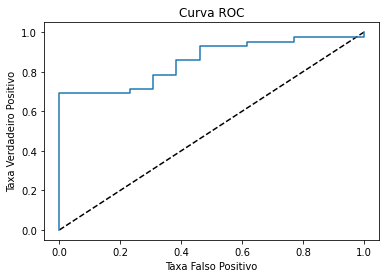

In [33]:
# Plotando a curva ROC
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show();


In [34]:
# Para avaliar a Curva ROC do gráfico acima, podemos determinar a área abaixo dela.
# Quanto maior a área, melhor é o modelo (o valor máximo é 1)

print(f"A área abaixo da curva ROC é: {roc_auc_score(y_test, y_pred_prob)}")


A área abaixo da curva ROC é: 0.8553113553113553
